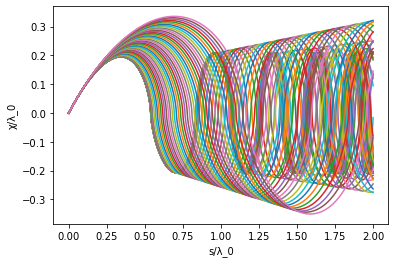

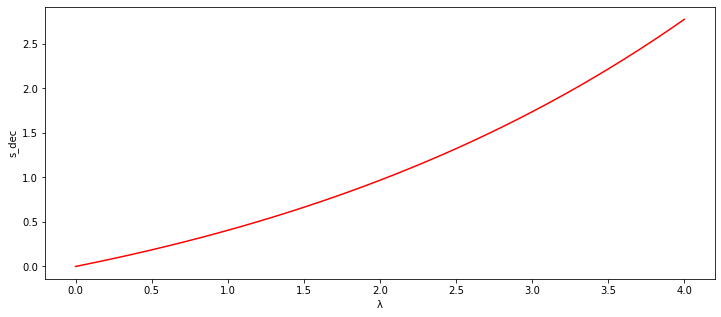

In [7]:
##Calculation of the s-value at which the PBH binary without dark matter halos decouples from 
#the background Hubble Expansion.

import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

π=np.pi
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity


   
    
λ_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,
        0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,
        2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0]



def s_(λ_0):
    def f(u,s,λ_0):
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(1) in reference pdf "M_DM at s_dec".
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.plot(As,Bs,'')
    plt.xlabel('s/λ_0')
    plt.ylabel('χ/λ_0')
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        s=As[i]               #s/λ at which the binary decouples.
        if Δ<0:
            break
        
    return s
    
    
s_list=np.zeros(len(λ_list))
s_dec_list=np.zeros(len(λ_list))




for i, λ_0 in enumerate(λ_list):
    s_list[i] = s_(λ_0)

for i, (λ_0,s) in enumerate(zip(λ_list,s_list)):
    s_dec_list[i]= s_dec(λ_0,s)

    
plt.figure(figsize=(12,5))
plt.plot(λ_list,s_dec_list,'r')
plt.xlabel('λ')
plt.ylabel('s_dec')
plt.title('')
plt.show()  

p=  
0.08206 x + 0.3356


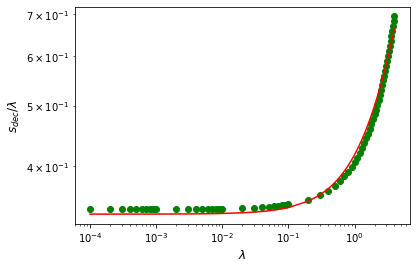

In [8]:
# Fitting of the the curve for the value of s/λ (at which the PBH binary decouples) vs λ for 
# the PBH binary without dark matter halos.


x = np.array(λ_list)
y = np.array(s_dec_list)  
Y=np.array(y/x)

z = np.polyfit(x, Y, 1)
p = np.poly1d(z)
print("p=",p)



plt.loglog(x,Y,'go')
plt.plot(x,p(x),'r')



plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$s_{dec}/λ$',fontsize=12)
plt.show()


# This gives s_dec=0.08206 λ + 0.3356 λ^2 .

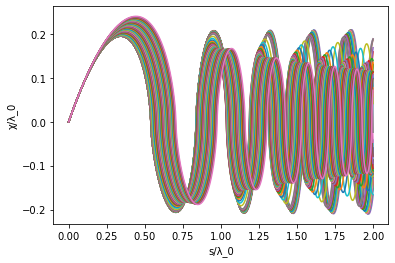

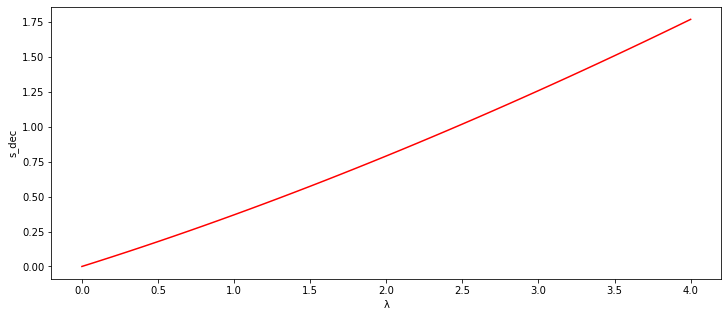

In [10]:
##Calculation of the s-value at which the PBH binary with dark matter halos decouples from 
#the background Hubble Expansion.

def M_halo(s):               #eq.(4) in reference pdf "M_DM at s_dec".
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)
                                *math.sqrt(s+1))+(4/3)))

def s_dec(λ_0,s):
    return (λ_0*s)

def h(x):
    return math.sqrt((x**-3)+(x**-4))   
def g(x):
    return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
                   
def  k(s):
    return (1/n(s))

def λ(s):
    return λ_0*k(s)
   
    
    

λ_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,
        0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,
        2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0]



def s_(λ_0):
    def f(u,s,λ_0):
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(1) in reference pdf "M_DM at s_dec".
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.plot(As,Bs,'')
    plt.xlabel('s/λ_0')
    plt.ylabel('χ/λ_0')
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        s=As[i]               #s/λ at which the binary decouples.
        if Δ<0:
            break
        
    return s
    
    
S_list=np.zeros(len(λ_list))
S_dec_list=np.zeros(len(λ_list))




for i, λ_0 in enumerate(λ_list):
    S_list[i] = s_(λ_0)

for i, (λ_0,s) in enumerate(zip(λ_list,S_list)):
    S_dec_list[i]= s_dec(λ_0,s)

    
plt.figure(figsize=(12,5))
plt.plot(λ_list,S_dec_list,'r')
plt.xlabel('λ')
plt.ylabel('s_dec')
plt.title('')
plt.show()  

p=  
0.02561 x + 0.3426


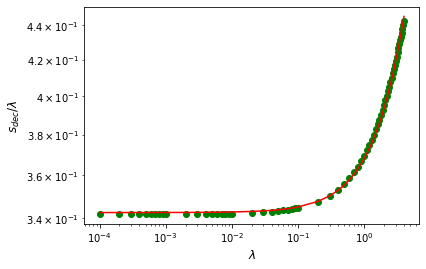

In [11]:
# Fitting of the the curve for the value of s/λ (at which the PBH binary decouples) vs λ for 
# the PBH binary with dark matter halos.

x = np.array(λ_list)
y = np.array(S_dec_list) 
Y=np.array(y/x)

z = np.polyfit(x, Y, 1)
p = np.poly1d(z)
print("p=",p)



plt.loglog(x,Y,'go')
plt.plot(x,p(x),'r')



plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$s_{dec}/λ$',fontsize=12)
plt.show()

# This gives s_dec=0.08206 λ + 0.3356 λ^2.